In [2]:
from onexmatch import onexmatch

help(onexmatch)

Help on function onexmatch in module onexmatch.core:

onexmatch(my_labels, your_labels, max_sep_arcsec=1, verbose=True, make_plot=True)
    Perform a sky coordinate crossmatch between two catalogs.
    
    Parameters:
        my_labels (dict): Dictionary with keys:
            'file' (str, optional): Path to the first catalog CSV file.
            'df' (pd.DataFrame, optional): DataFrame containing the first catalog.
            'label' (str): Short name for the survey (used in column renaming).
            'id' (str or list of str): Name(s) of the unique ID column(s).
            'ra' (str): Name of the Right Ascension column (in degrees).
            'dec' (str): Name of the Declination column (in degrees).
            'extra_columns' (list, optional): Additional columns to include in the output.
            One of 'file' or 'df' must be provided.
    
        your_labels (dict): Same structure as my_labels, for the second catalog.
    
        max_sep_arcsec (float): Maximum angula

Number of objects in J-PAS: 300
Number of objects in DESI: 100
Number of matches after imposing the constraint: 51
Number of matches after removing duplicates: 50
Output file saved to: /Users/rjovale/GitHub/onexmatch/example/onexmatch_J-PAS_DESI.csv
Median separation: 1.2 arcsec

Duplicates according to J-PAS:
 DESI_idx  J-PAS_idx      sep
        0          0 0.919971
       99          0 9.896381

Plot saved to: /Users/rjovale/GitHub/onexmatch/example/onexmatch_J-PAS_DESI_sep_and_skyplot.pdf


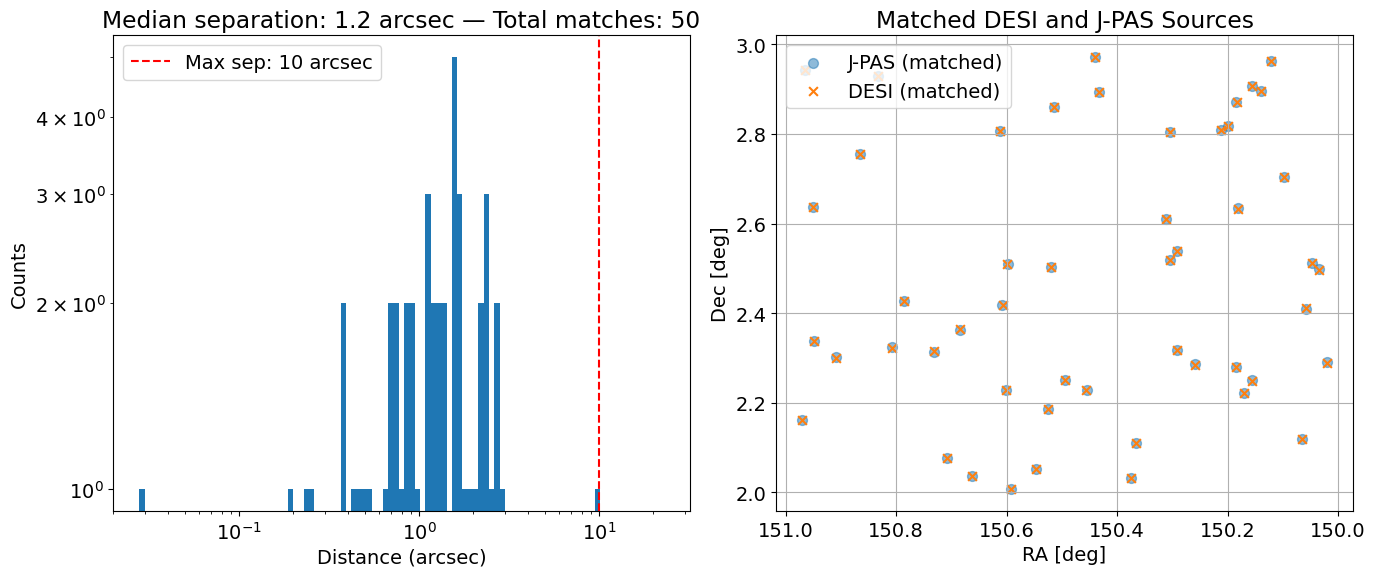

In [3]:
matched_df = onexmatch(
    my_labels={
        'file': 'J-PAS_synthetic.csv', # or 'df': my_df
        'label': 'J-PAS',
        'id': 'TILE-NUMBER',
        'ra': 'RA',
        'dec': 'DEC'
    },
    your_labels={
        'file': 'DESI_synthetic.csv', # or 'df': your_df
        'label': 'DESI',
        'id': 'TILE-ID',
        'ra': 'RA',
        'dec': 'DEC'
    },
    max_sep_arcsec=10,
    verbose=True,
    make_plot=True
)

In [4]:
matched_df.head()

,TILE-NUMBER,RA,DEC,TILE-ID_DESI,RA_DESI,DEC_DESI,separation_arcsec
0,J-PAS_18,150.431949,2.892552,DESI_18,150.431945,2.892559,0.027849
1,J-PAS_48,150.546742,2.051521,DESI_48,150.546710,2.051479,0.188738
2,J-PAS_45,150.662581,2.036860,DESI_45,150.662522,2.036887,0.232003
3,J-PAS_19,150.291284,2.539302,DESI_19,150.291229,2.539342,0.244950
4,J-PAS_12,150.832374,2.929622,DESI_12,150.832443,2.929698,0.366892
